In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import yelpapi









In [2]:
census_pd = pd.read_csv("project_data.csv")


# Preview the data
census_pd.head()





,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,4830620,2341093,2489527,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,...,18.286638,23.812766,10.229362,17.380511,1712.383573,78.274468,16.264085,5.260085,0.200596,10.686723
1,Alaska,733375,384160,349215,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,...,17.954217,21.990964,13.470482,11.663253,2102.443114,65.080723,27.586145,7.121687,0.209639,9.268072
2,Arizona,6641928,3299088,3342840,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,...,20.442442,26.056832,9.813069,9.877096,1843.647444,78.244752,15.364818,6.225149,0.165941,9.469901
3,Arkansas,2958208,1451913,1506295,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,...,17.985693,23.384088,11.154891,17.531241,1831.021866,76.176204,17.080730,6.535620,0.206423,8.529489
4,California,38421464,19087135,19334329,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,...,19.192177,23.656127,9.582901,11.403417,2140.543627,77.245901,13.978921,8.592965,0.182876,10.191290


In [3]:
from yelpapi import YelpAPI
yelp_api = YelpAPI('clXvdDssfwpiryl9URikQMy0kRfdf8yZBWqPSc4pk-bdiK52Awc7eAQxakB8rv0c_xlMLyU7Saw_In-8dI6UHvIN2HQC739yByp0AV_VMiltc8yIKzLnzlYMUV_aW3Yx')


def price_rating(state): 

    results = []
    states = []
    prices = []
    cuisines = []
    ratings = []
    totalreviews = []
    search_results = yelp_api.search_query(term="restaurant", location=state, limit=50, sort_by="review_count")
    for business in search_results['businesses']:
        
        try:
            price = business['price']
        except KeyError:
            price = "n/a"
        try:    
            rating= business['rating']
        except KeyError:
            rating = "n/a"
            
        try:
            cuisine=business["categories"][0]['alias']
        except KeyError:
            cuisine = "n/a"
            
        try:
            state=business["location"]['state']
        except KeyError:
            state="n/a"
        try:    
            reviews=business['review_count']
        except KeyError:
            reviews="n/a"
            
        states.append(state)
        prices.append(price)
        ratings.append(rating)
        cuisines.append(cuisine)
        totalreviews.append(reviews)
        
    food_df = pd.DataFrame({'States': states, 'Prices': prices, 'Ratings': ratings, 'Cuisines': cuisines, 'Reviews': totalreviews})
        
    return food_df
all_food_data = pd.DataFrame()

    
for state in census_pd['State']:
    all_food_data=pd.concat([all_food_data, price_rating(state)])

all_food_data
    

   


,States,Prices,Ratings,Cuisines,Reviews
0,AL,$$,4.5,bbq,620.0
1,AL,$$,4.5,mexican,480.0
2,AL,$$,4.5,bbq,459.0
3,AL,$$,4.5,cocktailbars,448.0
4,AL,$$,4.0,latin,433.0
5,AL,$$,4.0,burgers,404.0
6,AL,$$,4.5,southern,347.0
7,AL,$,4.0,burgers,339.0
8,AL,$$,3.5,bbq,322.0
9,AL,$$$,3.5,cajun,318.0


In [4]:
#maria
sum_by_state = all_food_data.groupby("States").sum()["Reviews"]
sum_by_state

States
AK      17480.0
AL      14258.0
ANT         1.0
AR       9072.0
AZ      71518.0
CA      30179.0
CO      65397.0
CT       6152.0
DC      90988.0
DE       8408.0
GA      67571.0
HI      94515.0
IA      10841.0
ID      14350.0
IL     146613.0
IN      29938.0
KS      15242.0
KY      23053.0
LA     104095.0
MA      80763.0
MD      40229.0
ME      25220.0
MI      33472.0
MN      35266.0
MO      24396.0
MS       7565.0
MT       4964.0
NC      33291.0
ND       4529.0
NE      15495.0
NH      10010.0
NJ      13502.0
NM      23206.0
NV     158984.0
NY     188628.0
OH      27432.0
OK      18618.0
OR      84850.0
PA      74897.0
PR      24127.0
RI      25459.0
SC      11602.0
SD       4330.0
TN      24807.0
TX      63931.0
UT      36722.0
VA      27277.0
VT      13132.0
WA      11344.0
WI      24413.0
WSX         1.0
WV       4464.0
WY         18.0
Name: Reviews, dtype: float64

In [5]:
#maria
sum_by_gender = all_food_data.groupby("States").sum()["Reviews"]
count_by_state

NameError: name 'count_by_state' is not defined

In [ ]:
#maria
census_pd

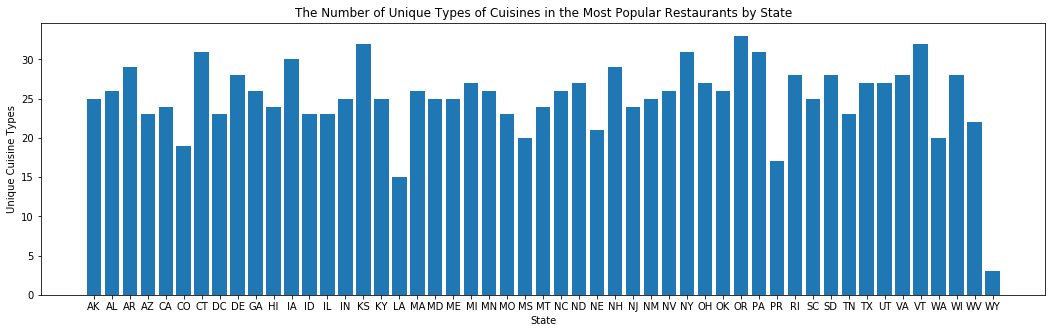

In [6]:
state_type = all_food_data.groupby(["States"])
food_group = state_type["Cuisines"].nunique()
food_drop1 = food_group.drop("ANT")
clean_food = food_drop1.drop("WSX")
df = pd.DataFrame(clean_food)
states_food = df.reset_index()


plt.figure(figsize=(18,5))
plt.bar(states_food["States"],states_food["Cuisines"])
plt.title("The Number of Unique Types of Cuisines in the Most Popular Restaurants by State")
plt.xlabel("State")
plt.ylabel("Unique Cuisine Types")


plt.savefig("cuisines_state",bbox_inches='tight',dpi=100)
plt.show()